### Artificial Neural Network

- Exploring and Processing the Data
- Building and Training our Neural Network
- Visualizing Loss and Accuracy
- Adding Regularization to our Neural Network

### Exploring and Processing the Data

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/housepricedata.csv')
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   LotArea           1460 non-null   int64
 1   OverallQual       1460 non-null   int64
 2   OverallCond       1460 non-null   int64
 3   TotalBsmtSF       1460 non-null   int64
 4   FullBath          1460 non-null   int64
 5   HalfBath          1460 non-null   int64
 6   BedroomAbvGr      1460 non-null   int64
 7   TotRmsAbvGrd      1460 non-null   int64
 8   Fireplaces        1460 non-null   int64
 9   GarageArea        1460 non-null   int64
 10  AboveMedianPrice  1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


The dataset that we have now is in what we call a pandas dataframe. To convert it to an array, simply access its values:

In [2]:
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

Now, we split the dataset into our input features and the label we wish to predict.

In [3]:
X = dataset[:,0:10]
Y = dataset[:,10]

Normalizing our data is very important, as we want the input features to be on the same order of magnitude to make our training easier. We'll use a min-max scaler from scikit-learn which scales our data to be between 0 and 1.

In [5]:

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

Lastly, we wish to set aside some parts of our dataset for a validation set and a test set. We use the function train_test_split from scikit-learn to do that.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


### Building and Training Our First Neural Network

In [8]:
import tensorflow as tf
from tensorflow import keras

In [9]:
from tensorflow.keras import layers

We will be using the Sequential model, which means that we merely need to describe the layers above in sequence. Our neural network has three layers:

- Hidden layer 1: 32 neurons, ReLU activation
- Hidden layer 2: 32 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation

In [10]:
model = tf.keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(10,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

Now that we've got our architecture specified, we need to find the best numbers for it. Before we start our training, we have to configure the model by

- Telling it what algorithm you want to use to do the optimization (we'll use stochastic gradient descent)
- Telling it what loss function to use (for binary classification, we will use binary cross entropy)
- Telling it what other metrics you want to track apart from the loss function (we want to track accuracy as well)

In [11]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Training on the data is pretty straightforward and requires us to write one line of code. The function is called 'fit' as we are fitting the parameters to the data. We specify:

- what data we are training on, which is X_train and Y_train
- the size of our mini-batch
- how long we want to train it for (epochs)
- what our validation data is so that the model will tell us how we are doing on the validation data at each point.

This function will output a history, which we save under the variable hist. We'll use this variable a little later.

In [12]:
hist = model.fit(X_train, Y_train,
          batch_size=32, # Number of samples per gradient update
          epochs=100, # Number of iterations
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 0.6675 - accuracy: 0.7114 - val_loss: 0.6617 - val_accuracy: 0.6986
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6561 - accuracy: 0.7270 - val_loss: 0.6513 - val_accuracy: 0.7078
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6461 - accuracy: 0.7260 - val_loss: 0.6423 - val_accuracy: 0.7397
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6365 - accuracy: 0.7593 - val_loss: 0.6333 - val_accuracy: 0.7489
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6272 - accuracy: 0.7818 - val_loss: 0.6244 - val_accuracy: 0.7443
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6181 - accuracy: 0.7857 - val_loss: 0.6159 - val_accuracy: 0.7671
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6091 - accuracy: 0.8229 - val_loss: 0.6067 - val_accuracy: 0.7671
Epoch 8/100
3

In [13]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 1ms/step - loss: 0.3031 - accuracy: 0.8813


0.8812785148620605

### Visualizing Loss and Accuracy

In [14]:
import matplotlib.pyplot as plt


We want to visualize the training loss and the validation loss like this:

In [15]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

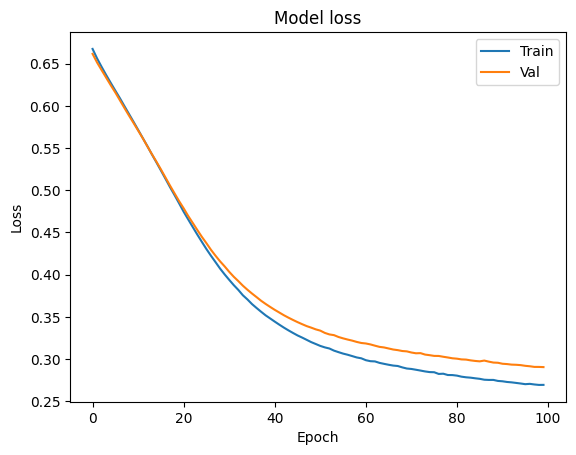

In [16]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

We can also visualize the training accuracy and the validation accuracy like this:

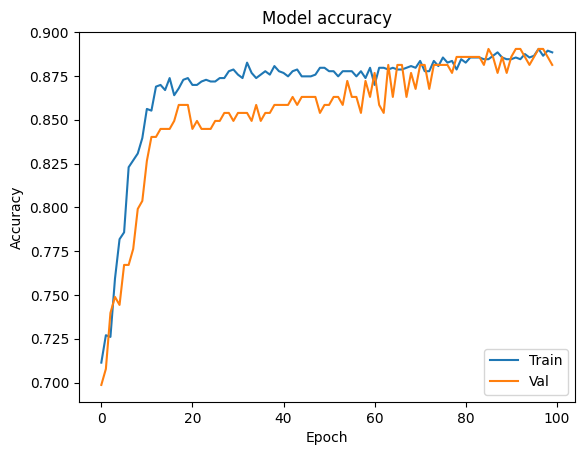

In [17]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

### Adding Regularization to our Neural Network

We'll train a model which will overfit, which we call Model 2. This might take a few minutes.

In [18]:
model_2 = tf.keras.Sequential([
    layers.Dense(1000, activation='relu', input_shape=(10,)),
    layers.Dense(1000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 34ms/step - loss: 0.4796 - accuracy: 0.7759 - val_loss: 0.4217 - val_accuracy: 0.8311
Epoch 2/100
32/32 [==============================] - 1s 30ms/step - loss: 0.3383 - accuracy: 0.8581 - val_loss: 0.3536 - val_accuracy: 0.8630
Epoch 3/100
32/32 [==============================] - 1s 31ms/step - loss: 0.3091 - accuracy: 0.8699 - val_loss: 0.3332 - val_accuracy: 0.8721
Epoch 4/100
32/32 [==============================] - 1s 30ms/step - loss: 0.3081 - accuracy: 0.8728 - val_loss: 0.3526 - val_accuracy: 0.8539
Epoch 5/100
32/32 [==============================] - 1s 30ms/step - loss: 0.2912 - accuracy: 0.8933 - val_loss: 0.3680 - val_accuracy: 0.8311
Epoch 6/100
32/32 [==============================] - 1s 31ms/step - loss: 0.2775 - accuracy: 0.8826 - val_loss: 0.3171 - val_accuracy: 0.8904
Epoch 7/100
32/32 [==============================] - 1s 30ms/step - loss: 0.2557 - accuracy: 0.8953 - val_loss: 0.2853 - val_accuracy: 0.8904
Epoch 

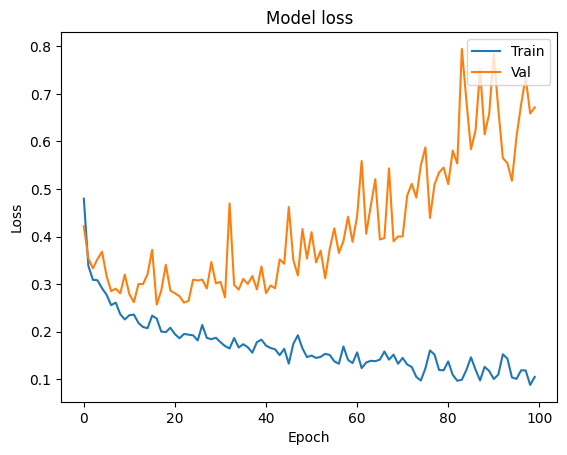

In [19]:

plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

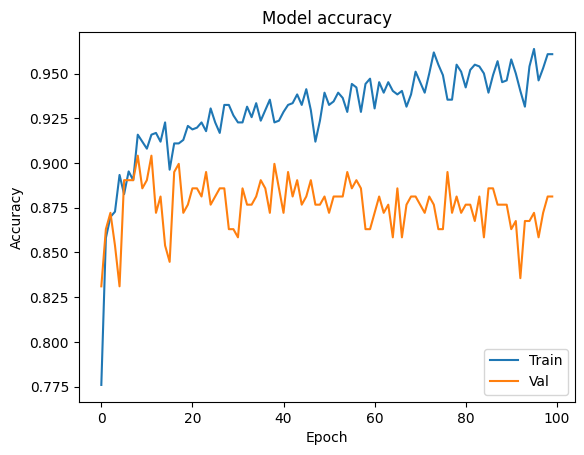

In [20]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

To address the overfitting we see in Model 2, we'll incorporate L2 regularization and dropout in our third model here (Model 3).

In [21]:
model_3 = tf.keras.Sequential([
    layers.Dense(1000, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01), input_shape=(10,)),
    layers.Dropout(0.3),
    layers.Dense(1000, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(1000, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(1000, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid', kernel_regularizer=keras.regularizers.l2(0.01)),
])

In [22]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 40ms/step - loss: 14.2256 - accuracy: 0.6448 - val_loss: 3.8849 - val_accuracy: 0.7489
Epoch 2/100
32/32 [==============================] - 1s 34ms/step - loss: 1.6674 - accuracy: 0.8288 - val_loss: 0.6900 - val_accuracy: 0.8584
Epoch 3/100
32/32 [==============================] - 1s 34ms/step - loss: 0.5954 - accuracy: 0.8464 - val_loss: 0.5196 - val_accuracy: 0.8676
Epoch 4/100
32/32 [==============================] - 1s 35ms/step - loss: 0.5259 - accuracy: 0.8601 - val_loss: 0.5220 - val_accuracy: 0.8447
Epoch 5/100
32/32 [==============================] - 1s 34ms/step - loss: 0.4966 - accuracy: 0.8708 - val_loss: 0.5103 - val_accuracy: 0.8493
Epoch 6/100
32/32 [==============================] - 1s 34ms/step - loss: 0.4908 - accuracy: 0.8728 - val_loss: 0.5032 - val_accuracy: 0.8539
Epoch 7/100
32/32 [==============================] - 1s 35ms/step - loss: 0.4731 - accuracy: 0.8796 - val_loss: 0.4597 - val_accuracy: 0.8950
Epoch

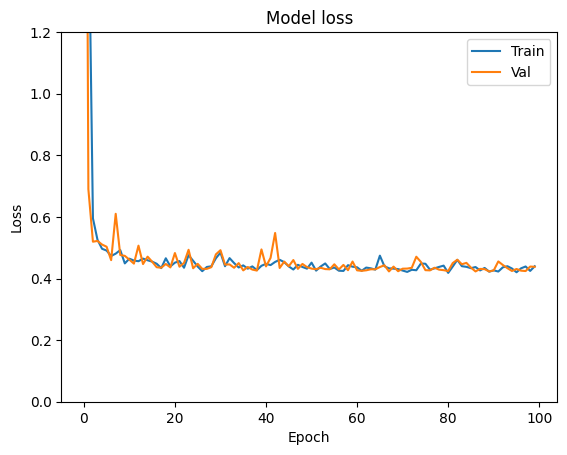

In [23]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

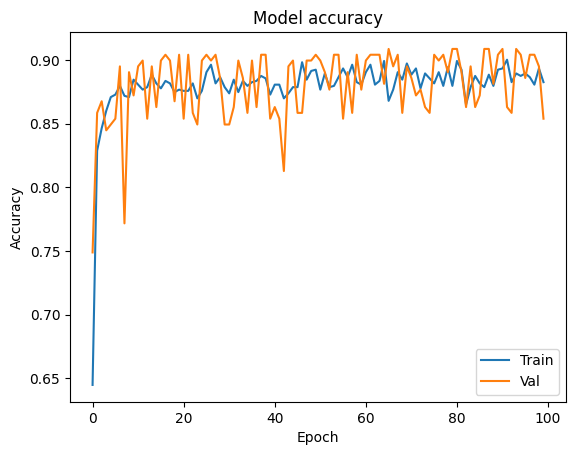

In [24]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


As compared to Model 2, you should see that there's less overfitting!